In [306]:
#read data
import pandas as pd
import numpy as np
train_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_X, train_Y  = train_data.iloc[:,1:-1], train_data.iloc[:,-1:]      #not including ID. Keep data in order for cooresponding Y
test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
test_X, test_Y  = test_data.iloc[:,1:], pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")['SalePrice']

print(train_X.columns)
print(train_Y.columns)
print(train_X.columns)
print(train_Y.columns)
print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
assert train_X.shape[1] == test_X.shape[1], print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
assert train_X.shape[0] == train_Y.shape[0] 
assert test_X.shape[0] == test_Y.shape[0] 



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [307]:
#clean data
print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

#first combine data, so that get_dummies will have all classes
all_data = pd.concat([train_X, test_X], axis=0)
col_list = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

all_data_dummy = pd.get_dummies(all_data, columns=col_list)
all_data_dummy = all_data_dummy.fillna(0).astype(float).apply(normalize)

train_X = all_data_dummy.iloc[:train_X.shape[0]]
test_X =  all_data_dummy.iloc[train_X.shape[0]:]
#print(clear_data.columns)
print(test_X.isna().sum().sum())



assert train_X.shape[1] == test_X.shape[1], print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")


train_X.shape[1] 79, test_X.shape[1] 79
0


In [308]:
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import time
warnings.filterwarnings('ignore')


def KNN(X_train, Y_train, X_val, Y_val, K):
  """
  K nearest neighbour algorithm
  """
  knn = KNeighborsRegressor(n_neighbors=K)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_val)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("KNN Model Parameters:", knn.get_params())
  return rmse, Y_pred



def DNN(X_train, Y_train, X_val, Y_val, epoch, indimension):
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(indimension,)))  
  model.add(Dense(256, activation='relu'))  
  model.add(Dense(1))  
  model.compile(optimizer='adam', loss='mse')
  model.fit(X_train, Y_train, epochs=epoch, batch_size=32, verbose=0)
  Y_pred = model.predict(X_val)
  Y_pred = np.squeeze(Y_pred)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("DNN Model Parameters:", model.get_config())
  return rmse, Y_pred


def LR(X_train, Y_train, X_val, Y_val):
  regression = LinearRegression()
  regression.fit(X_train, Y_train)
  Y_pred = regression.predict(X_val)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("Intercept:", regression.intercept_)
  print("Coefficients:", regression.coef_)
  
  return rmse, Y_pred


def Forest(X_train, Y_train, X_val, Y_val, num):
  forest = RandomForestRegressor(n_estimators=num)
  forest.fit(X_train, Y_train)
  Y_pred = forest.predict(X_val)
  rmse = mean_squared_error(Y_val, Y_pred, squared=False)
  print("number of trees:", forest.n_estimators)
  print("max features:", forest.max_features)
  print("depth:", forest.max_depth)
  return rmse, Y_pred
  

In [309]:
# train_X = train_X.dropna().to_numpy()
# train_Y = train_Y.dropna().to_numpy()
# test_X = test_X.dropna().to_numpy()
# test_Y = test_Y.dropna().to_numpy()


In [310]:

train_X.to_csv("train_X.txt", sep="\t", index=False)
test_X.to_csv("test_X.txt", sep="\t", index=False)

In [311]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
train_Y = np.squeeze(train_Y)

(1460, 287)
(1460, 1)
(1459, 287)
(1459,)


KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
K=1, KNN: 75987.68065477347
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
K=2, KNN: 70480.048457487
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
K=4, KNN: 66906.92856361027
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
K=8, KNN: 64172.22122251133
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}
K=16, KNN: 62365.393887394785
KNN 

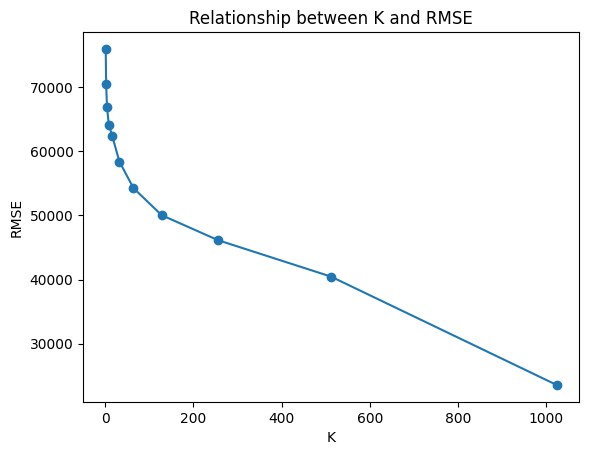

In [312]:
K_set = []
rmse_set = []
for K in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
  rmse_KNN, Y_pred_KNN = KNN(train_X, train_Y, test_X, test_Y, K)
  K_set.append(K)
  rmse_set.append(rmse_KNN)
  print(f"K={K}, KNN: {rmse_KNN}")
  
plt.plot(K_set, rmse_set, marker='o')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Relationship between K and RMSE')
plt.show()

In [313]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1460, 287)
(1460,)
(1459, 287)
(1459,)


46/46 [==============================] - 0s 891us/step
DNN Model Parameters: {'name': 'sequential_21', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 287), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_63_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_63', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 287), 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 287)}}, {'module

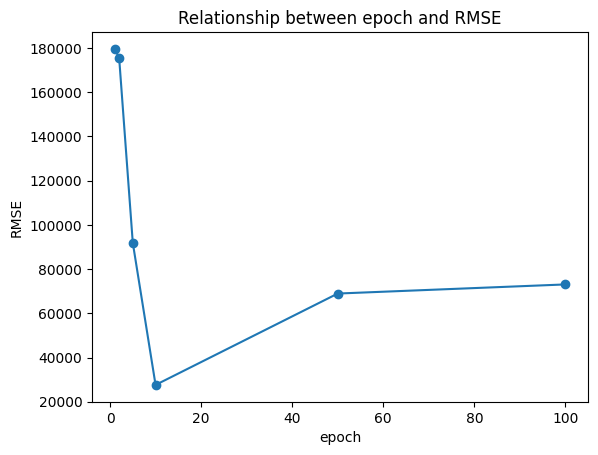

In [314]:
epoch_set = []
rmse_set = []
indimension = train_X.shape[1]
for epoch in [1, 2, 5, 10, 50, 100]:
  rmse_DNN, Y_pred_DNN = DNN(train_X, train_Y, test_X, test_Y, epoch, indimension)
  print(f"epoch:{epoch}, DNN: {rmse_DNN}")
  epoch_set.append(epoch)
  rmse_set.append(rmse_DNN)
  
plt.plot(epoch_set, rmse_set, marker='o')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('Relationship between epoch and RMSE')
plt.show()

number of trees: 1
max features: 1.0
depth: None
n_estimators:1, rmse: 73304.6423735236
number of trees: 2
max features: 1.0
depth: None
n_estimators:2, rmse: 70360.93657709993
number of trees: 5
max features: 1.0
depth: None
n_estimators:5, rmse: 70642.73169883243
number of trees: 10
max features: 1.0
depth: None
n_estimators:10, rmse: 71077.78928962923
number of trees: 50
max features: 1.0
depth: None
n_estimators:50, rmse: 70180.18106218414
number of trees: 100
max features: 1.0
depth: None
n_estimators:100, rmse: 70138.49902585955
number of trees: 1000
max features: 1.0
depth: None
n_estimators:1000, rmse: 69998.29172141847


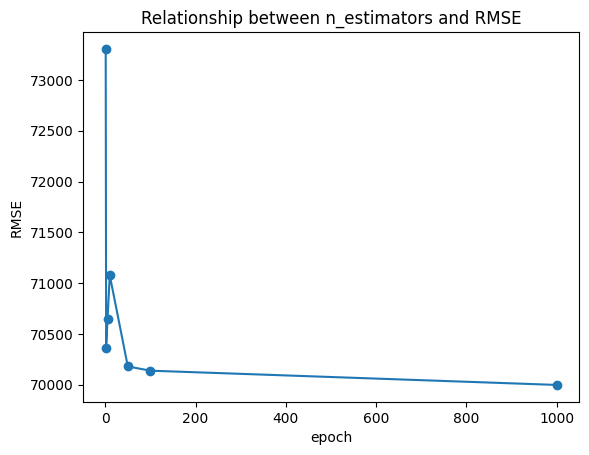

In [315]:
n_estimators_set = []
rmse_set = []
for n_estimators in [1, 2, 5, 10, 50, 100, 1000]:
  rmse_forest, Y_pred_forest = Forest(train_X, train_Y, test_X, test_Y,  n_estimators)
  print(f"n_estimators:{n_estimators}, rmse: {rmse_forest}")
  n_estimators_set.append(n_estimators)
  rmse_set.append(rmse_forest)
  
plt.plot(n_estimators_set, rmse_set, marker='o')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('Relationship between n_estimators and RMSE')
plt.show()

In [316]:
print(train_X.shape)

(1460, 287)
